In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'C:\Users\Kerry\Global_AI_Content_Impact_Dataset.csv')
print(data.shape)
data.head()

(200, 12)


,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64

In [15]:
data.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


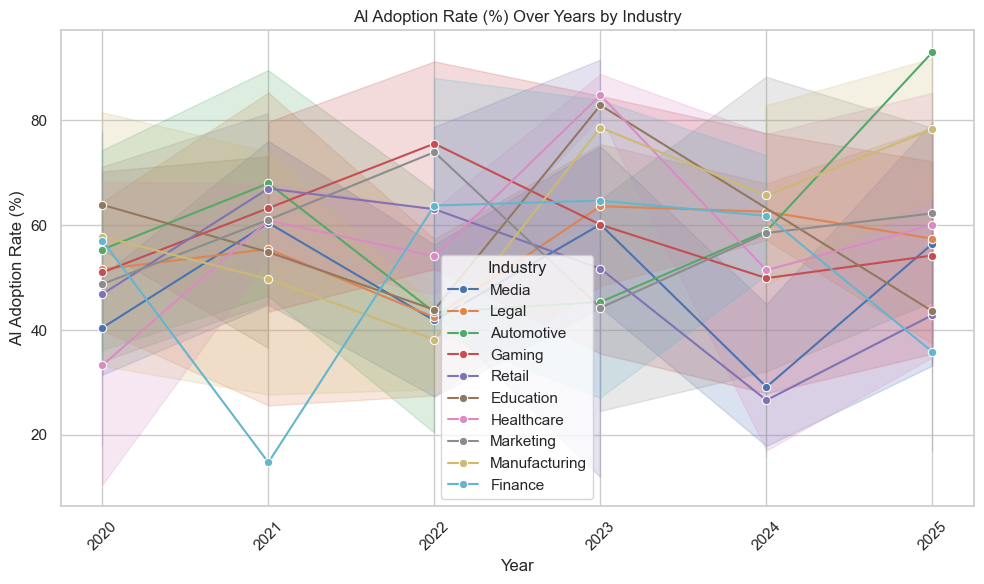

In [16]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: AI Adoption Rate over Years by Industry
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Year", y="AI Adoption Rate (%)", hue="Industry", marker="o")
plt.title("AI Adoption Rate (%) Over Years by Industry")
plt.ylabel("AI Adoption Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Linear Regression

In [17]:
X = data.iloc[:,[3,4,5,6,7,11]].values
y = data.iloc[:,5].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
r2_score = regressor.score(X_test, y_test)
print(f"Mean Squared Erroe: {mse}")
print(f"R Squared score: {r2_score}")

Mean Squared Erroe: 1.0266038605319941e-28
R Squared score: 1.0


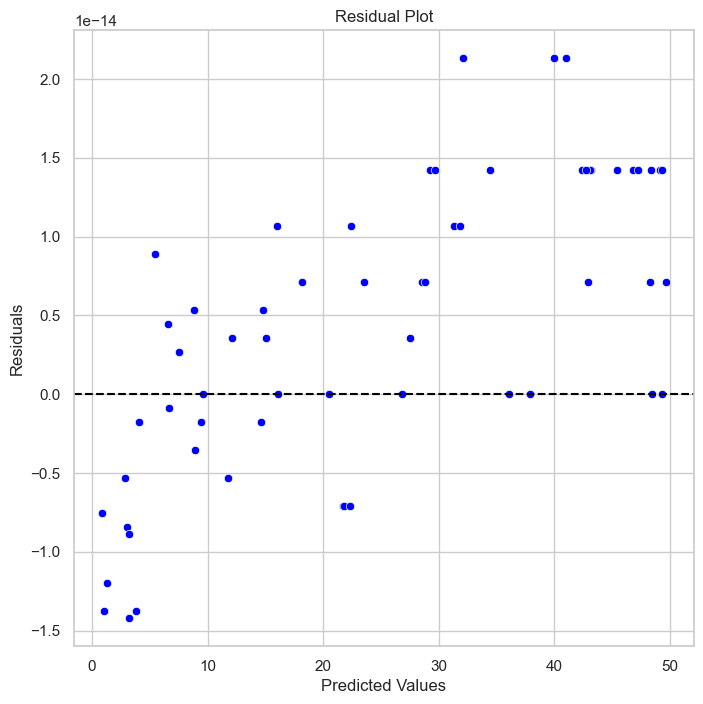

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_pred, y=residuals, color="blue")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()